Reference : https://pythonrobotics.readthedocs.io/en/latest/modules/appendix/appendix.html

In [2]:
import numpy as np
import random

x = [3,1,2]
p=[0.1,0.3,0.4]
E_x=np.sum(np.multiply(x,p))
print(E_x)

1.4000000000000001


In [3]:
x=np.random.randn(10)
np.var(x)

0.5423500134970367

## Covariance

In [4]:
x=np.random.random((3,3))
print("x=",x)
np.cov(x)

x= [[0.71855705 0.64852917 0.98955159]
 [0.20504141 0.24356862 0.06188603]
 [0.45624346 0.52496679 0.28729407]]


array([[ 0.0324397 , -0.01724169, -0.02194144],
       [-0.01724169,  0.0091644 ,  0.01166912],
       [-0.02194144,  0.01166912,  0.01495919]])

In [5]:
x_cor = np.random.random((1,10))
y_cor = np.random.random((1,10))
print("x_cor = ",x_cor)
print("y_cor = ",y_cor)
np.cov(x_cor,y_cor) # N-1 정규화

x_cor =  [[0.06160384 0.78949712 0.6695256  0.65447119 0.28913358 0.96250128
  0.34068592 0.43630717 0.38423489 0.79808119]]
y_cor =  [[0.64729555 0.21830035 0.40125365 0.66935668 0.92202746 0.60483858
  0.32847478 0.8775702  0.36505314 0.71016411]]


array([[ 0.07819567, -0.0138218 ],
       [-0.0138218 ,  0.0563931 ]])

In [6]:
np.cov(x_cor,y_cor,bias=1) # bias = 1, N에 의한 정규화

array([[ 0.0703761 , -0.01243962],
       [-0.01243962,  0.05075379]])

## Central Limit Theorem

(array([ 2.,  2.,  7., 10., 18., 20., 18., 14.,  5.,  4.]),
 array([14.75133752, 14.79827914, 14.84522075, 14.89216236, 14.93910397,
        14.98604559, 15.0329872 , 15.07992881, 15.12687043, 15.17381204,
        15.22075365]),
 <BarContainer object of 10 artists>)

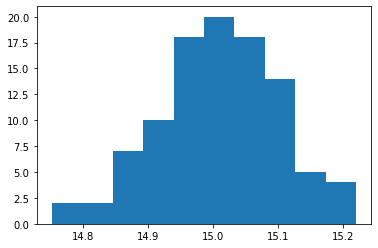

In [25]:
import matplotlib.pyplot as plt
import random
a = np.zeros((100,))
for i in range(100):
    x=[random.uniform(1,10) for _ in range(1000)]
    a[i]=np.sum(x,axis=0)/1000
    #print(a[i])
plt.hist(a)


## Gaussian Distribution

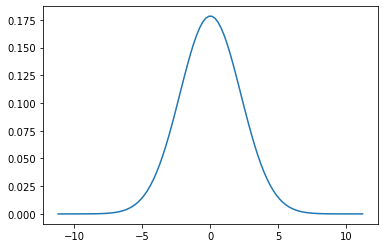

In [24]:
import matplotlib.mlab as mlab
import math
import scipy.stats

mu = 0
variance = 5
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma,mu+5*sigma,100)
plt.plot(x,scipy.stats.norm.pdf(x,mu,sigma))
plt.show()

## Gaussian Properties

New mean is at:  5.0
New variance is:  1.0


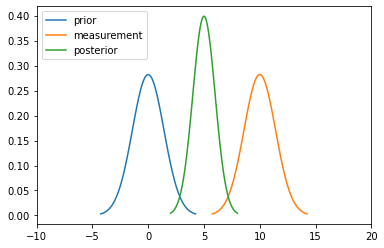

In [29]:
import matplotlib.mlab as mlab
import math
mu1 = 0
variance1 = 2
sigma = math.sqrt(variance1)
x1 = np.linspace(mu1-3*sigma,mu1+3*sigma,100)
plt.plot(x1,scipy.stats.norm.pdf(x1,mu1,sigma),label='prior')

mu2 = 10
variance2 = 2
sigma = math.sqrt(variance2)
x2 = np.linspace(mu2-3*sigma,mu2+3*sigma,100)
plt.plot(x2,scipy.stats.norm.pdf(x2,mu2,sigma),label='measurement')

mu_new=(mu1*variance2+mu2*variance1)/(variance1+variance2)
print("New mean is at: ",mu_new)
var_new=(variance1*variance2)/(variance1+variance2)
print("New variance is: ",var_new)

sigma=math.sqrt(var_new)
x3 = np.linspace(mu_new - 3*sigma,mu_new+3*sigma,100)
plt.plot(x3,scipy.stats.norm.pdf(x3,mu_new,var_new),label='posterior')
plt.legend(loc='upper left')
plt.xlim(-10,20)
plt.show()

$$P(X|Z)=\frac{P(Z|X)P(X)}{P(Z)}$$
P(X|Z) is Posterior, P(X), P(Z) is prior, P(Z|X) is measurement